In [24]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta
%matplotlib inline


In [25]:
os.getcwd()
os.chdir('/Users/Jeffrey.Lu@ibm.com/Desktop')

In [26]:
df = pd.read_csv('Ad_CTR_Optimization.csv')

In [27]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4999.50000,4999.50000,0.170300,0.129500,0.072800,0.119600,0.269500,0.012600,0.111200,0.209100,0.095200,0.04890
std,2886.89568,2886.89568,0.375915,0.335769,0.259821,0.324509,0.443722,0.111546,0.314395,0.406686,0.293506,0.21567
min,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2499.75000,2499.75000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4999.50000,4999.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7499.25000,7499.25000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9999.00000,9999.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Unnamed: 0      10000 non-null int64
Unnamed: 0.1    10000 non-null int64
Ad 1            10000 non-null int64
Ad 2            10000 non-null int64
Ad 3            10000 non-null int64
Ad 4            10000 non-null int64
Ad 5            10000 non-null int64
Ad 6            10000 non-null int64
Ad 7            10000 non-null int64
Ad 8            10000 non-null int64
Ad 9            10000 non-null int64
Ad 10           10000 non-null int64
dtypes: int64(12)
memory usage: 937.6 KB


In [29]:
df.apply(pd.Series.value_counts).head(2)

,Unnamed: 0,Unnamed: 0.1,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,1,8297.0,8705.0,9272.0,8804.0,7305.0,9874.0,8888.0,7909.0,9048.0,9511.0
1,1,1,1703.0,1295.0,728.0,1196.0,2695.0,126.0,1112.0,2091.0,952.0,489.0


In [30]:
df.drop(columns = ['Unnamed: 0','Unnamed: 0.1'], inplace = True)

In [15]:
#A/B Test with Thompson Sampling

num_obs = len(df) # Total number of observations or the total number of ads to be served
num_ad_var = len(df.columns)# Total number of different ad variations
ads_selected = [] # List to track which ad variation served 
number_of_clicks_1 = [0] * num_ad_var #alpha term in the beta distribtion
number_of_nonclicks_0 = [0] * num_ad_var #beta term in the beta distribution
total_clicks = 0
for n in range(0, num_obs):
    ad = 0
    max_random = 0
    for i in range(0, num_ad_var): # This loop is going to initially assign a uniformly distributed theta value (where alpha=1, beta=1)for each ad variant and then select the ad variance with the highest beta.
        random_beta = random.betavariate(number_of_clicks_1[i] + 1, number_of_nonclicks_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    clicks = df.values[n, ad]
    if clicks == 1:
        number_of_clicks_1[ad] = number_of_clicks_1[ad] + 1 #Updating alpha term
    else:
        number_of_nonclicks_0[ad] = number_of_nonclicks_0[ad] + 1 #Updating beta term
    total_clicks = total_clicks + clicks #Tracking total clicks

Text(0, 0.5, 'Number of Ads Served')

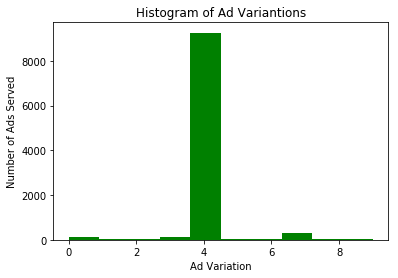

In [16]:
# Visualising Thompson Sampling results

plt.hist(ads_selected, color = 'green')
plt.title('Histogram of Ad Variantions')
plt.xlabel('Ad Variation')
plt.ylabel('Number of Ads Served')

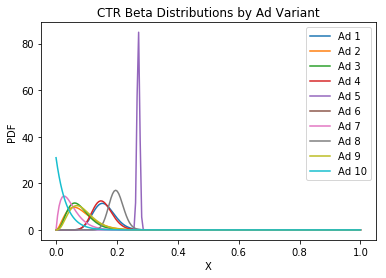

In [22]:
#Plotting Beta Distributions

x1 = np.linspace(0,1, 200)
y1 = beta.pdf(x1, a = number_of_clicks_1[0], b = number_of_nonclicks_0[0])

x2 = np.linspace(0,1, 200)
y2 = beta.pdf(x2, a = number_of_clicks_1[1], b = number_of_nonclicks_0[1])

x3 = np.linspace(0,1, 200)
y3 = beta.pdf(x3, a = number_of_clicks_1[2], b = number_of_nonclicks_0[2])

x4 = np.linspace(0,1, 200)
y4 = beta.pdf(x4, a = number_of_clicks_1[3], b = number_of_nonclicks_0[3])

x5 = np.linspace(0,1, 200)
y5 = beta.pdf(x5, a = number_of_clicks_1[4], b = number_of_nonclicks_0[4])

x6 = np.linspace(0,1, 200)
y6 = beta.pdf(x6, a = number_of_clicks_1[5], b = number_of_nonclicks_0[5])

x7 = np.linspace(0,1, 200)
y7 = beta.pdf(x7, a = number_of_clicks_1[6], b = number_of_nonclicks_0[6])

x8 = np.linspace(0,1, 200)
y8 = beta.pdf(x8, a = number_of_clicks_1[7], b = number_of_nonclicks_0[7])

x9 = np.linspace(0,1, 200)
y9 = beta.pdf(x9, a = number_of_clicks_1[8], b = number_of_nonclicks_0[8])

x10 = np.linspace(0,1, 200)
y10 = beta.pdf(x10, a = number_of_clicks_1[9], b = number_of_nonclicks_0[9])


plt.plot(x1,y1, label= 'Ad 1')
plt.plot(x2,y2, label= 'Ad 2')
plt.plot(x3,y3, label= 'Ad 3')
plt.plot(x4,y4, label= 'Ad 4')
plt.plot(x5,y5, label= 'Ad 5')
plt.plot(x6,y6, label= 'Ad 6')
plt.plot(x7,y7, label= 'Ad 7')
plt.plot(x8,y8, label= 'Ad 8')
plt.plot(x9,y9, label= 'Ad 9')
plt.plot(x10,y10, label= 'Ad 10')

plt.title('CTR Beta Distributions by Ad Variant')
plt.xlabel('X')
plt.ylabel('PDF')
plt.legend()
plt.show()
    